data/2017_11_24/img/greedy_mdp_margin_i30.png


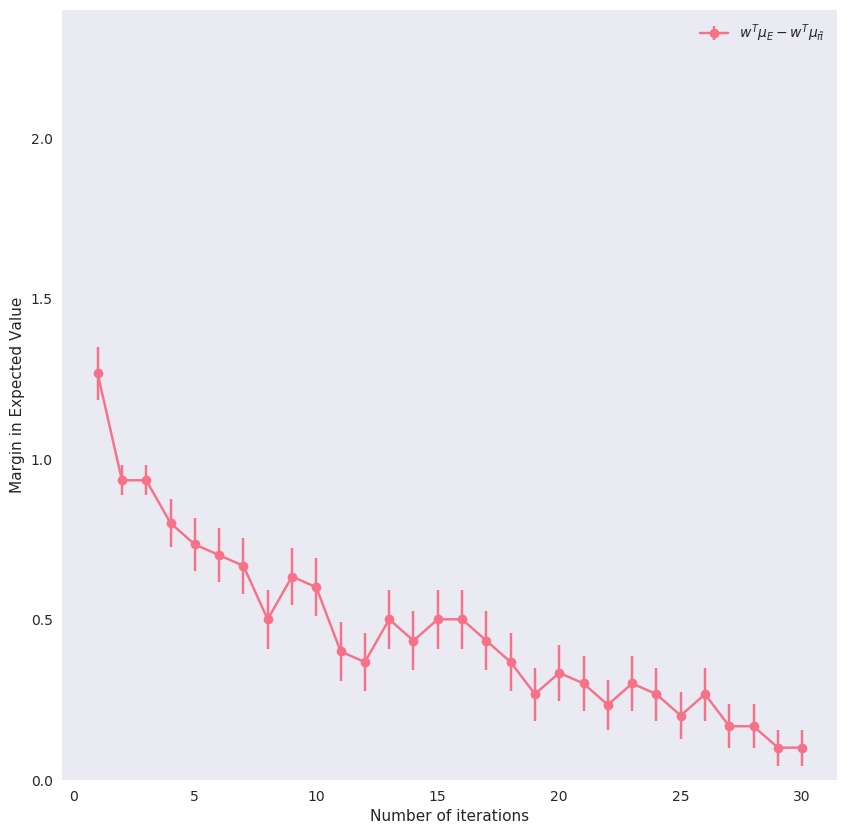

data/2017_11_24/img/greedy_physician_dist_mu_i30.png


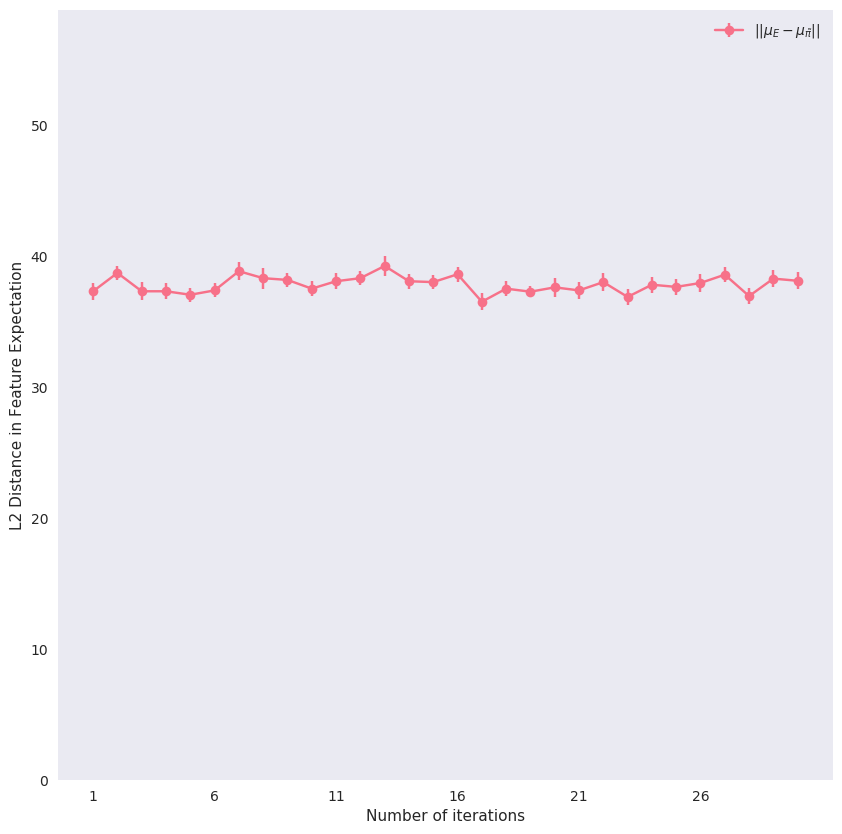

data/2017_11_24/img/stochastic_mdp_margin_i30.png


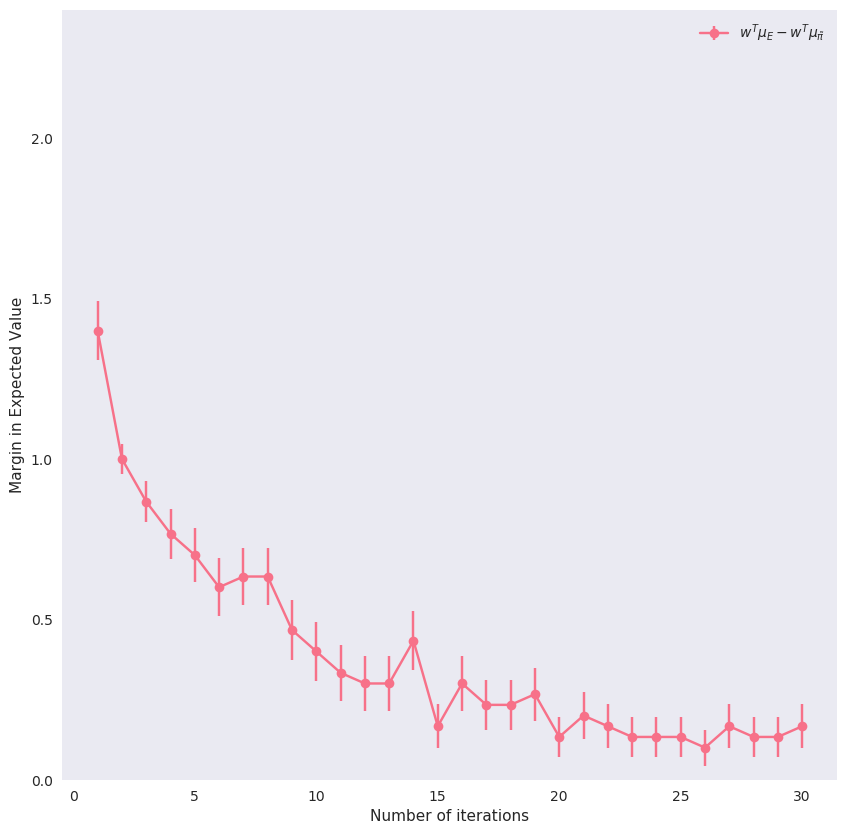

data/2017_11_24/img/greedy_physician_margin_i30.png


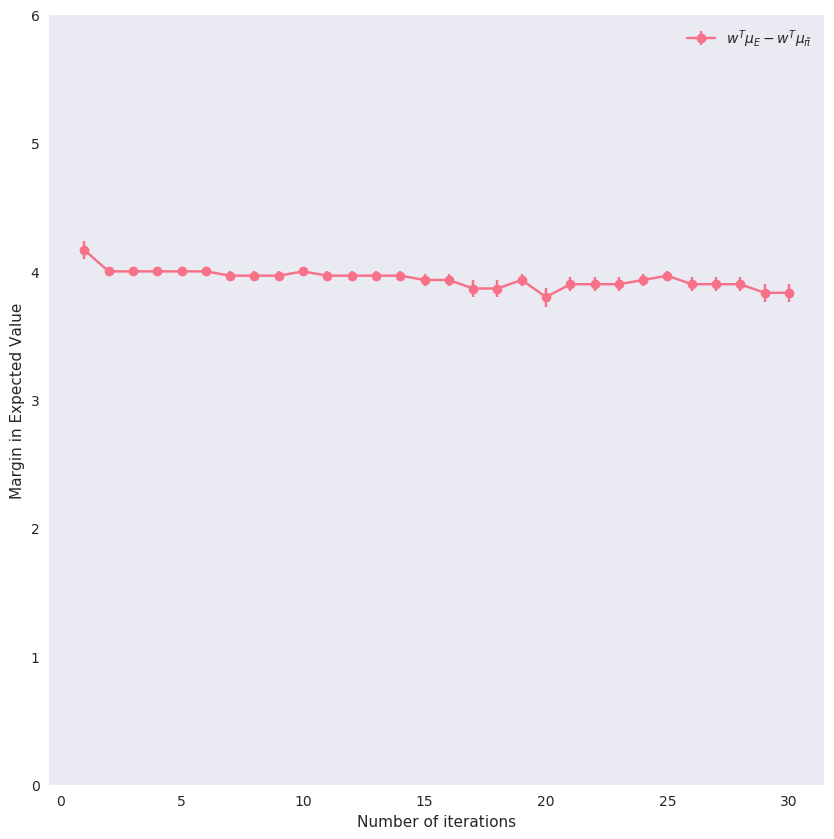

data/2017_11_24/img/stochastic_physician_margin_i30.png


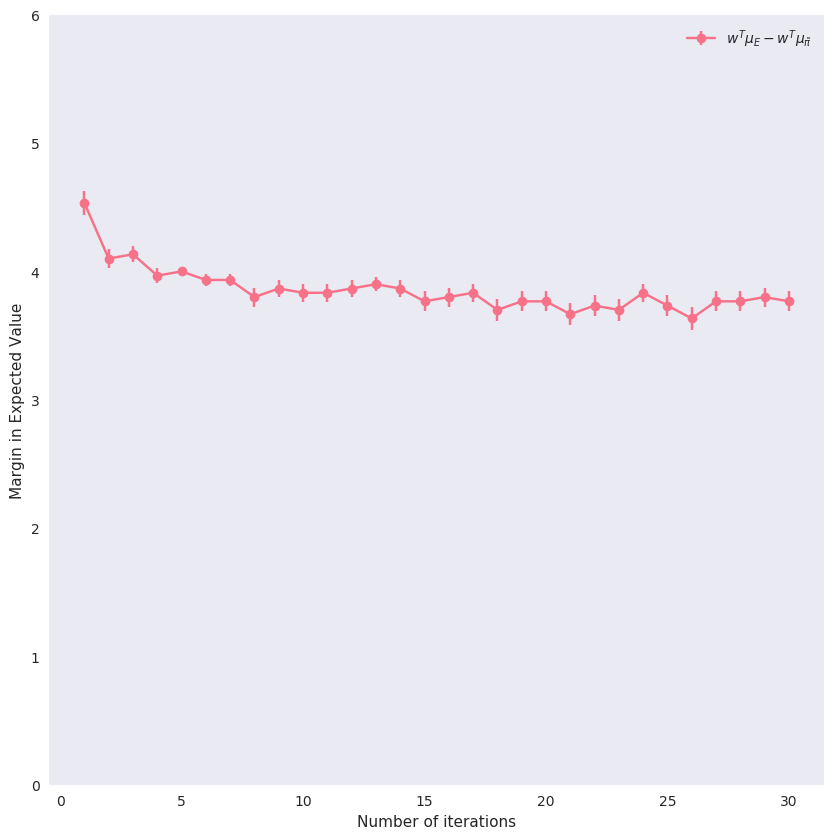

data/2017_11_24/img/stochastic_mdp_v_pi_i30.png


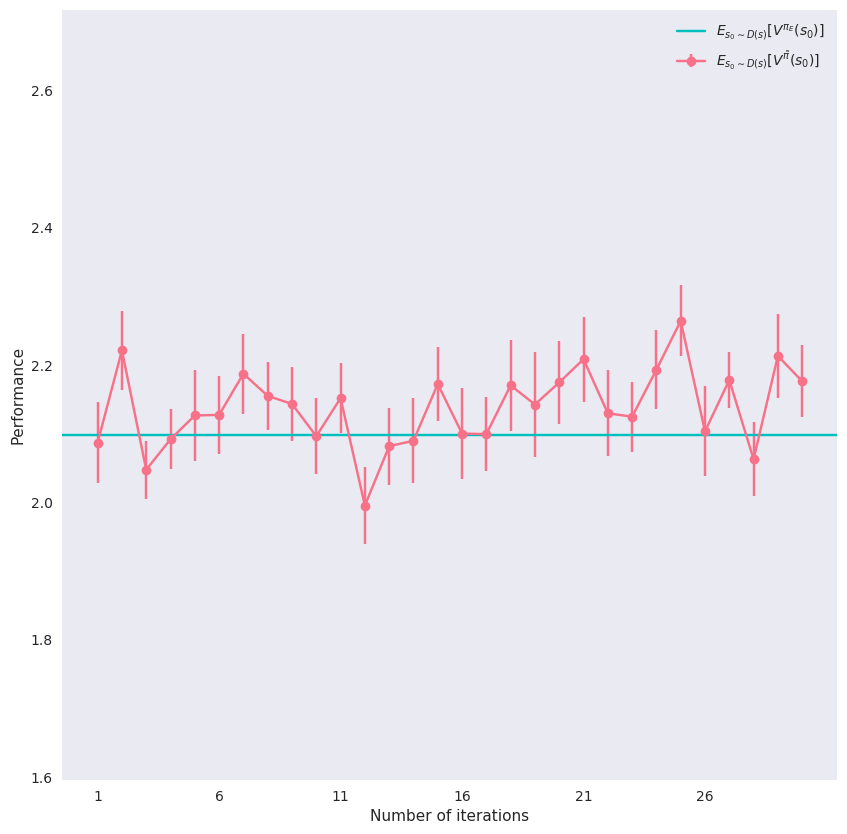

data/2017_11_24/img/greedy_mdp_v_pi_i30.png


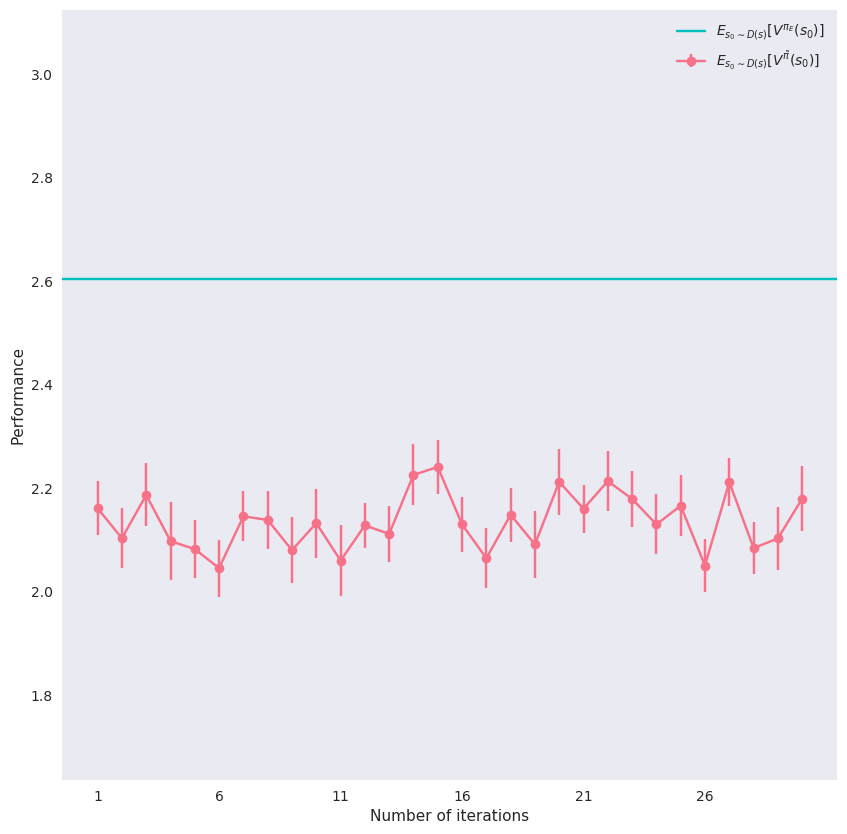

data/2017_11_24/img/greedy_mdp_dist_mu_i30.png


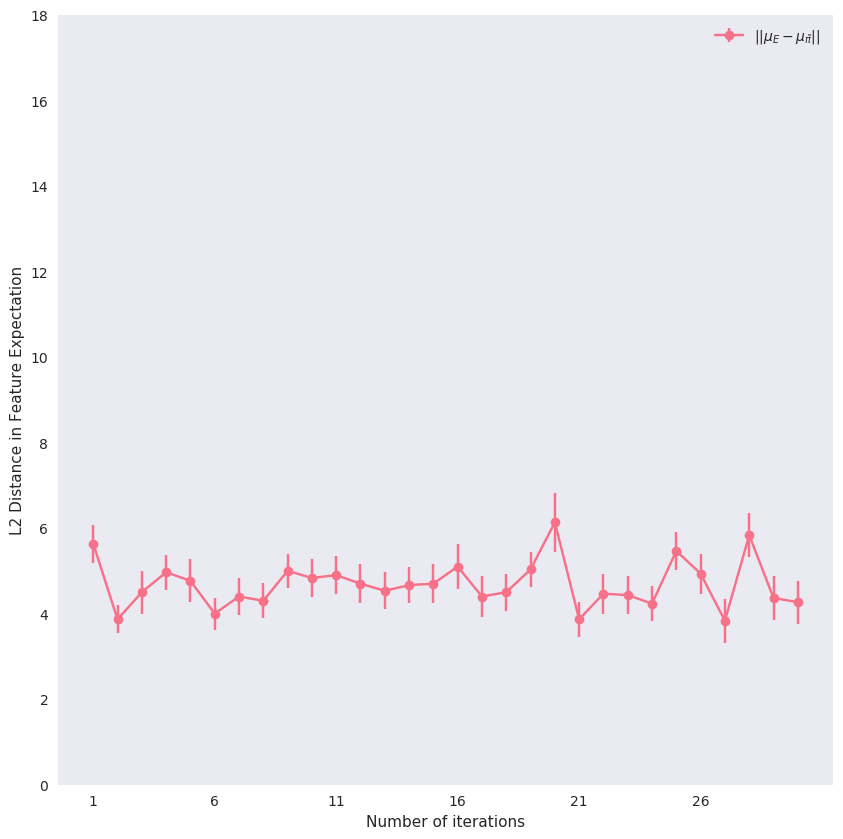

data/2017_11_24/img/stochastic_physician_v_pi_i30.png


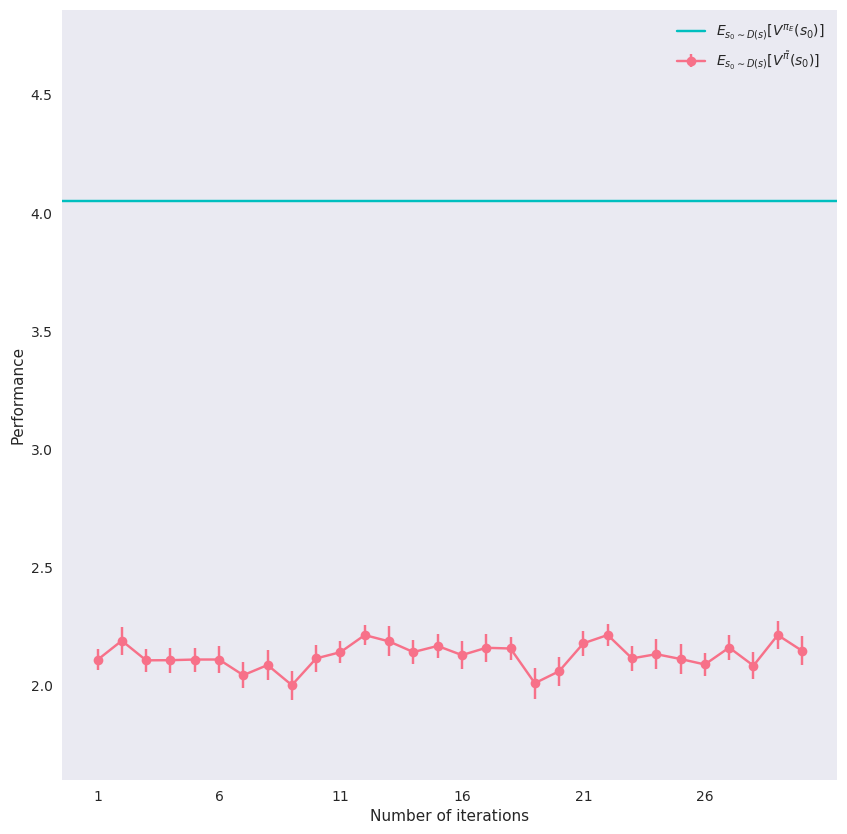

data/2017_11_24/img/stochastic_physician_dist_mu_i30.png


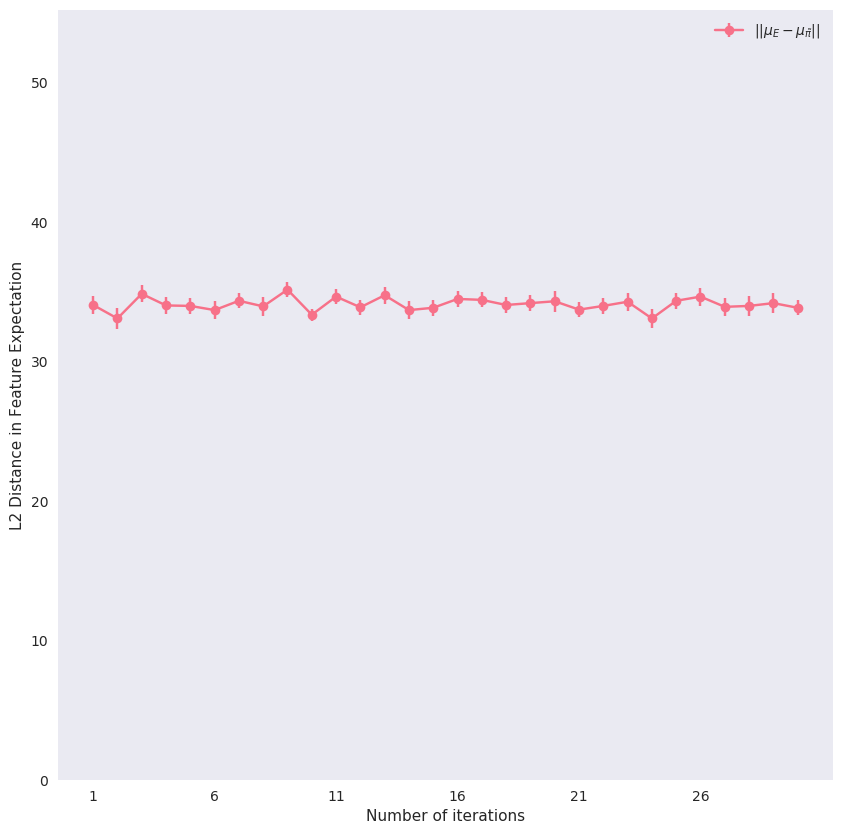

data/2017_11_24/img/stochastic_mdp_dist_mu_i30.png


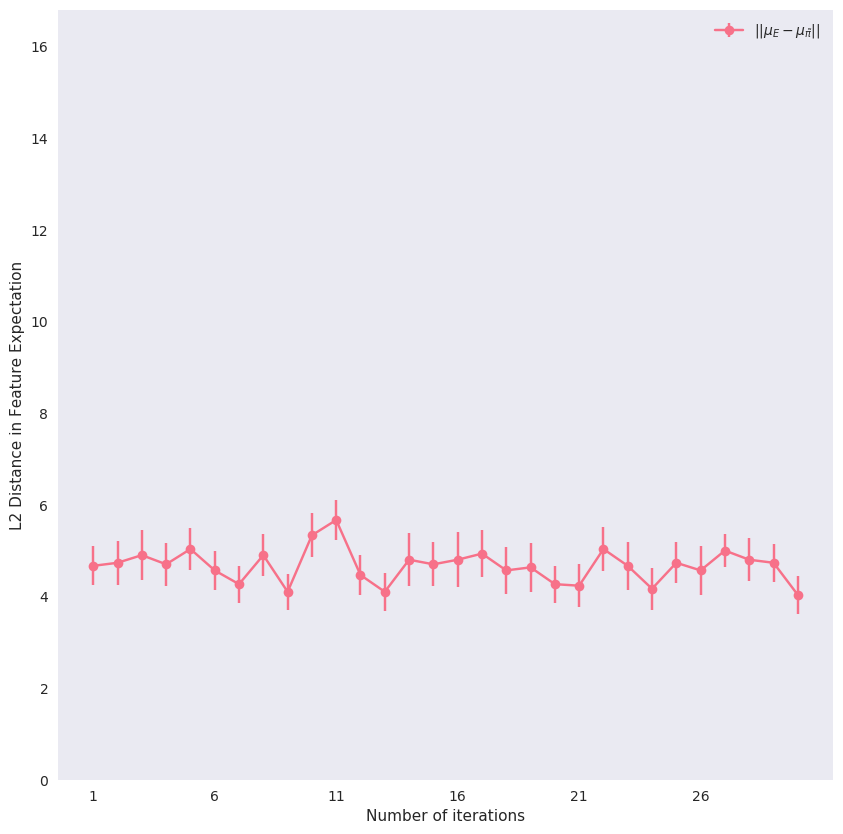

data/2017_11_24/img/greedy_physician_v_pi_i30.png


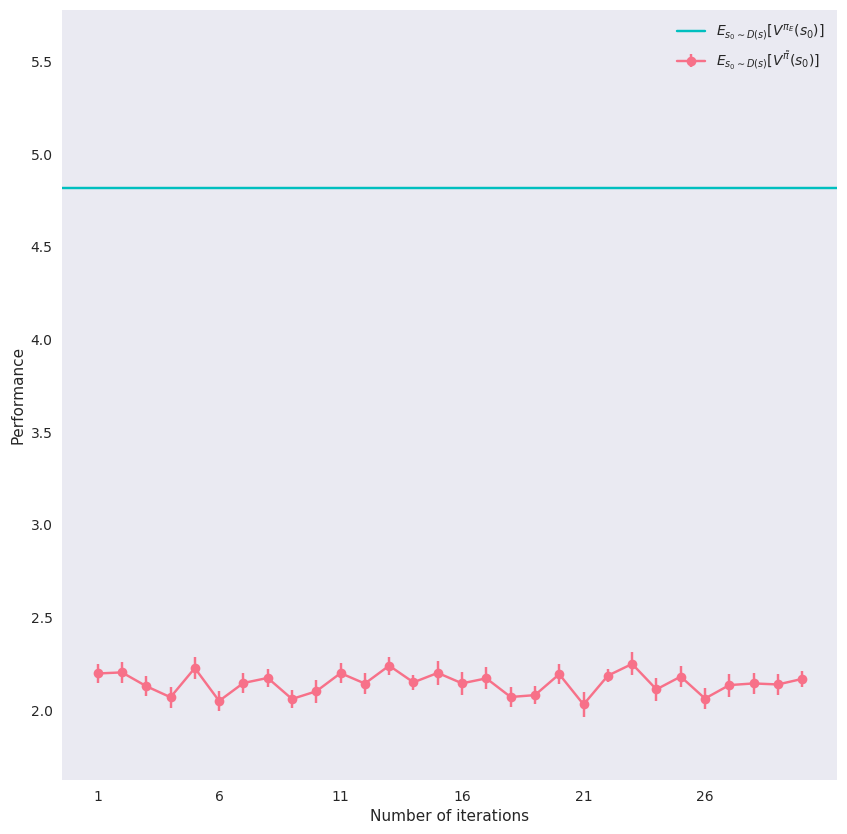

data/2017_11_24/img/stochastic_physician_margin_i15.png


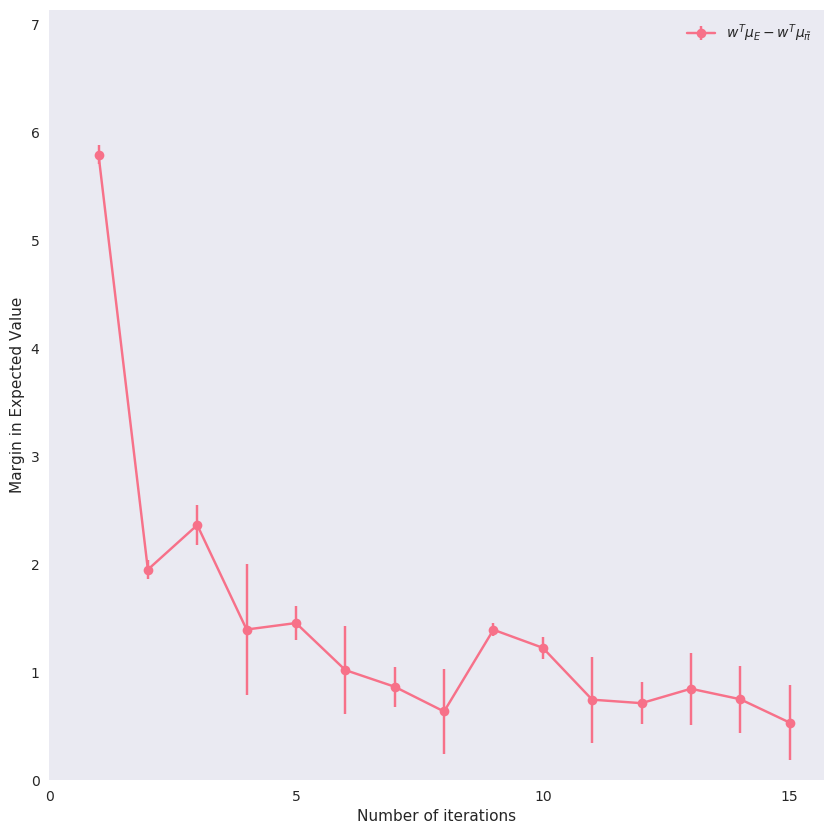

data/2017_11_24/img/stochastic_physician_v_pi_i15.png


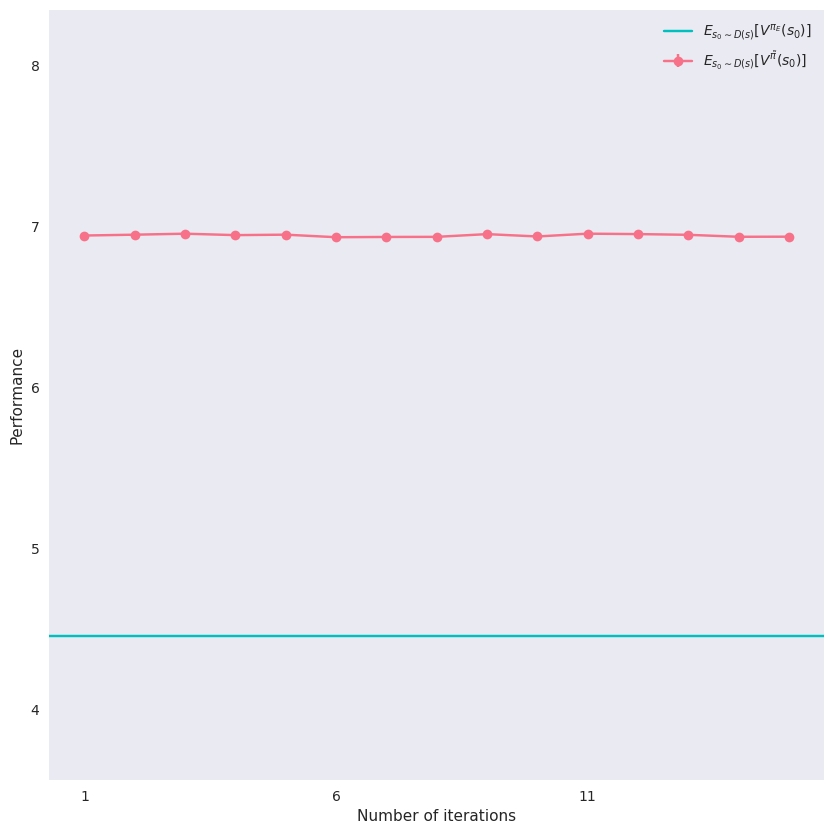

data/2017_11_24/img/greedy_physician_dist_mu_i15.png


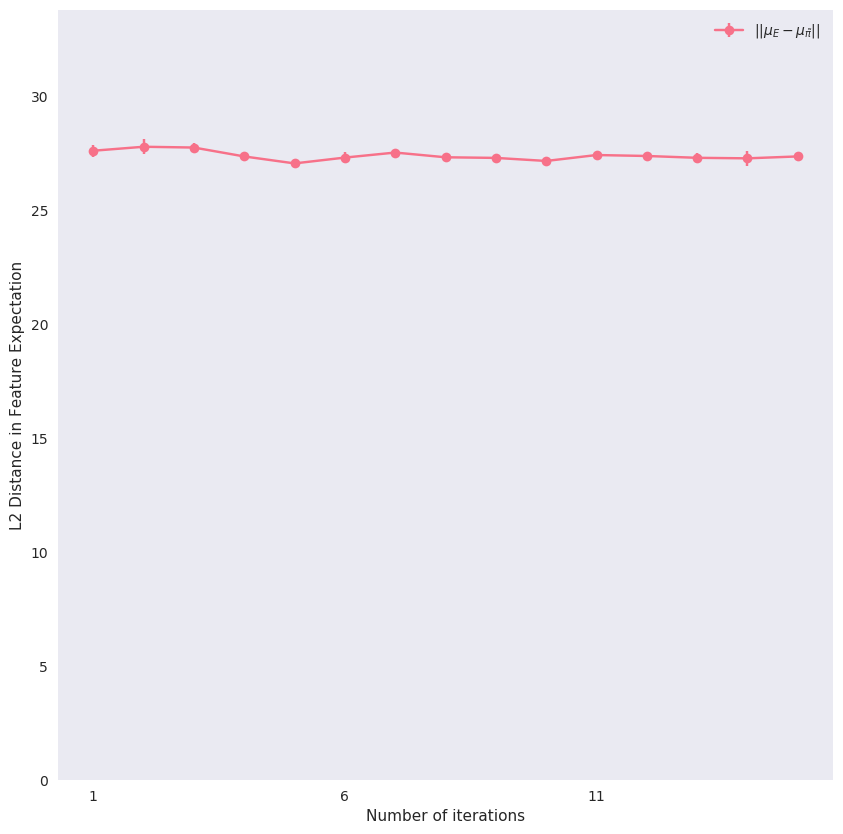

data/2017_11_24/img/greedy_physician_v_pi_i15.png


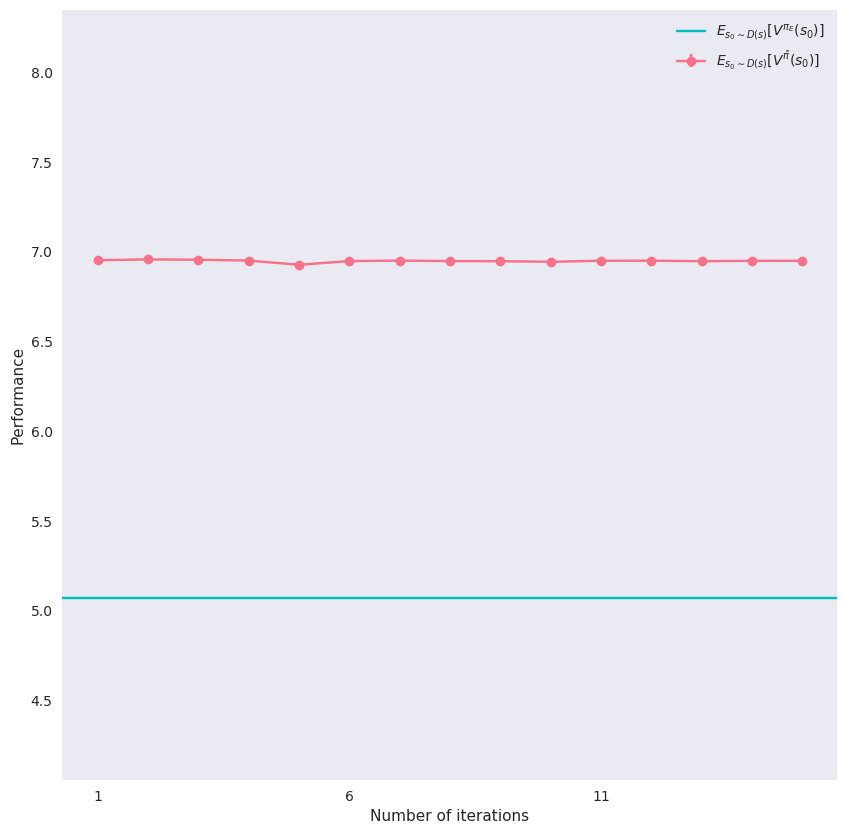

data/2017_11_24/img/stochastic_physician_dist_mu_i15.png


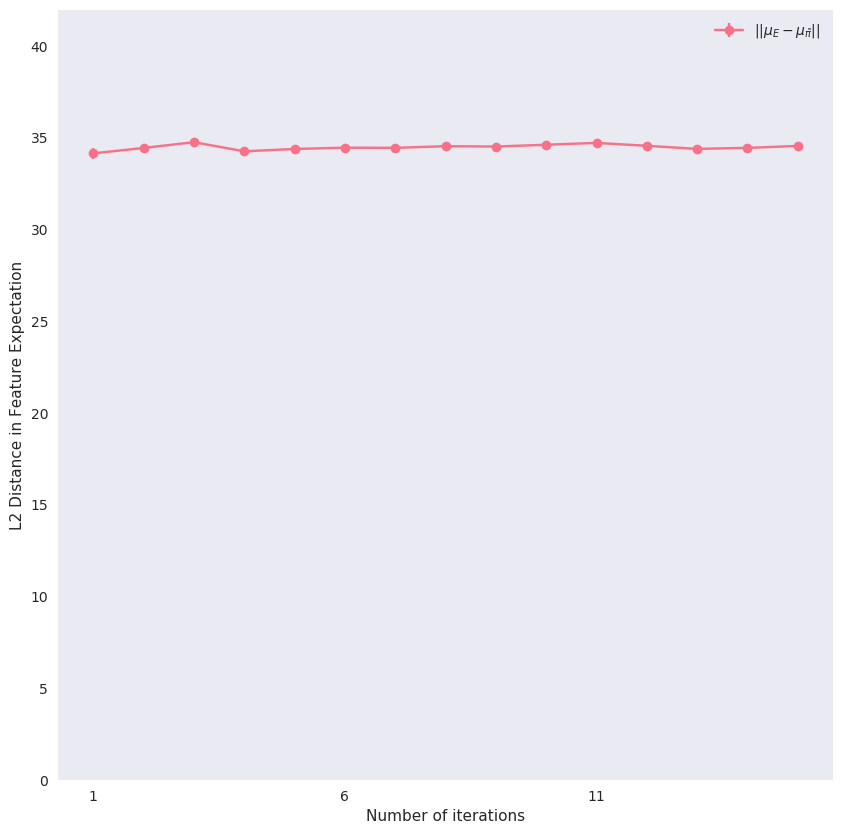

data/2017_11_24/img/greedy_physician_margin_i15.png


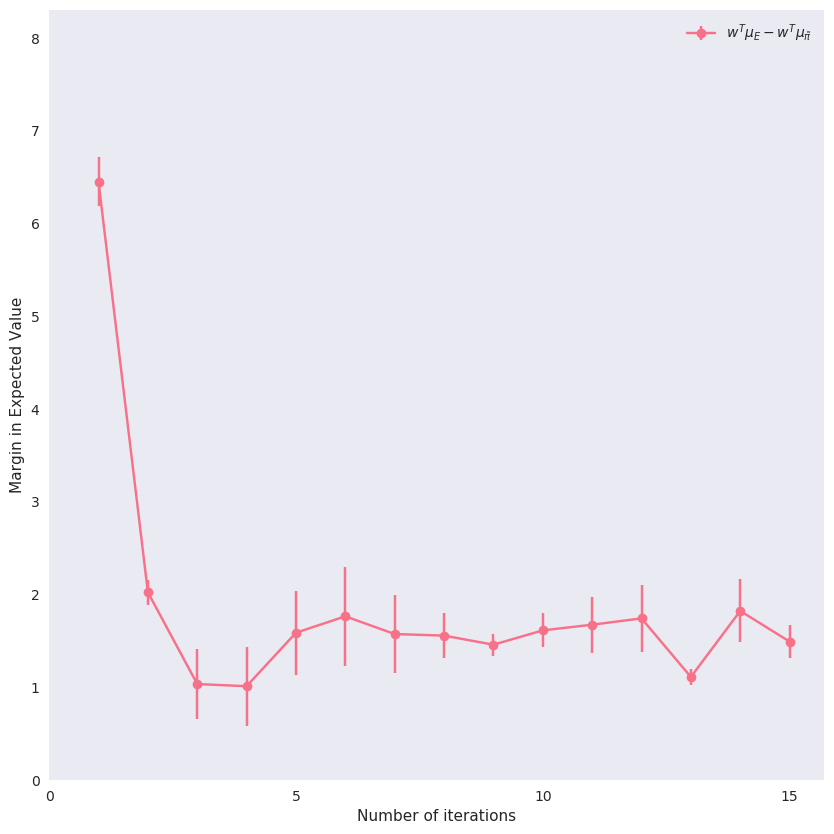

test settings used


'\nnum_trials = 30\nnum_iterations = 30\nsvm_penalty = 300.0\nsvm_epsilon = 1e-4\n# this just means our IRL-derived policy will be greedy\n# when used to create a new mu_pi_tilda during IRL\nirl_use_stochastic_policy = False\nverbose = False\n\n@@@@NOTE: The filename printed should give you an idea what kind of expert IRL was performed against\n\ne.g. data/2017_11_24/img/greedy_mdp_margin_i30.png\n\nmeans IRL was performed for a MDP-optimal expert policy which was greedy with 30 iterations\nand it shows margin (see the label for definition)\n\nthe test data policy (in numpy pickle and so on) is in data/2017_11_24 folder\n'

In [16]:
from IPython.display import Image, display
from glob import glob

images_i30 = glob('data/2017_11_24/img/*_i30.png')
images_i15 = glob('data/2017_11_24/img/*_i15.png')

for img_path in images_i30:
    print(img_path)
    display(Image(filename=img_path, width=700))
for img_path in images_i15:
    print(img_path)
    display(Image(filename=img_path, width=700))

print('test settings used')
'''
num_states = 750
num_actions = 25

tested on transition_matrix with:
1. 0.01/750 minimum transition probability to unobserved sas'
2. 1/750 minimum transition probability to unobserved sa pairs

tested on reward_matrix with:
1. max reward: +7 (sqrt of # features)
2. min reward: -7

num_trials = 30
num_iterations = 30
svm_penalty = 300.0
svm_epsilon = 1e-4
# this just means our IRL-derived policy will be greedy
# when used to create a new mu_pi_tilda during IRL
irl_use_stochastic_policy = False
verbose = False


@@@@NOTE: The filename printed should give you an idea what kind of expert IRL was performed against

e.g. data/2017_11_24/img/greedy_mdp_margin_i30.png

means IRL was performed for a MDP-optimal expert policy which was greedy with 30 iterations
and it shows margin (see the label for definition)

the test data policy (in numpy pickle and so on) is in data/2017_11_24 folder
'''
